#**Dataset para clasificación : Horse Colic**

David Felipe Corredor​

Diana Marcela Cristancho​
Edwin Yamith Zúñiga​

Lino Santiago Zamora​

# `**ACTUALIZAR**`

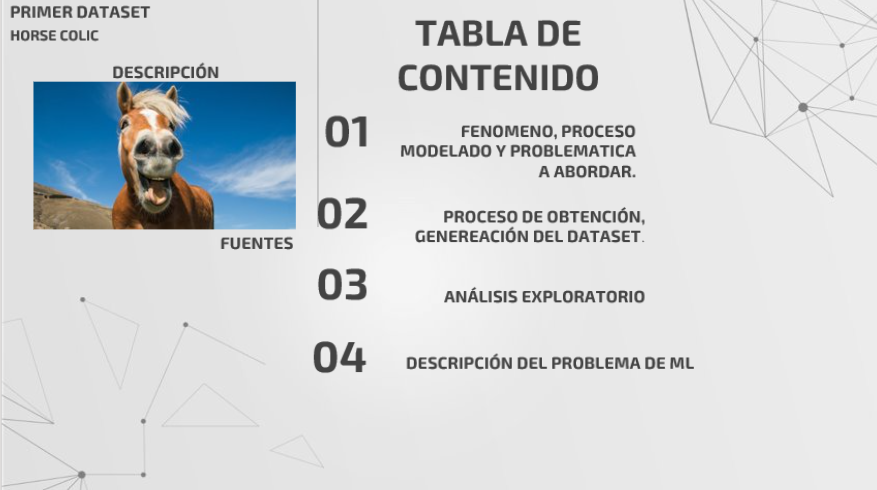

#Descripción del fenómeno/proceso modelado y de la problemática a abordar

 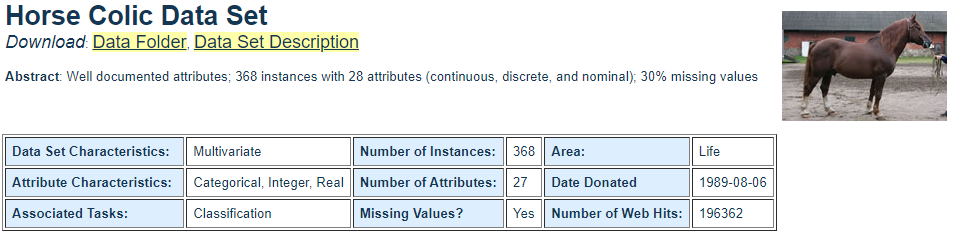

**Dataset: Horse colic**

Este dataset seleccionado contiene 368 registros con 27 atributos entre continuos, discretos y nominales, con 30% de datos perdidos.

Este dataset contiene un dato llamado Número de hospital(como numero de historia clinica), por lo que deducimos que son datos tomados de caballos atendidos en hospital, tambien incluye algunas caracteristicas, sus diferentes mediciones, sintomas presentados, etc..

**Contexto**:
El cólico en caballos puede ocurrir debido a la mala motilidad. En la mayoría de los casos, la causa de la motilidad deficiente no está clara, sin embargo la motilidad deficiente puede relacionarse con infecciones en el intestino o en la cavidad abdominal. Estos caballos a menudo se enferman debido a las toxinas que provienen del intestino


**Fuente** : UCI MACHINE LEARNING REPOSITORY (Center for Machine Learning and Intelligent Systems)

**Creadores:**

Mary McLeish & Matt Cecile

Departamento de ciencias de la computación

Universidad de Guelph

Guelph, Ontario, Canada N1G 2W1


**Donante:**

Will Taylor

**Compuesto por**


*   horse-colic.data = Archivo con 300 registros para entrenamiento
*   horse-colic.test = Archivo con 68 registros para prueba

**Index of horse-colic**

17 Jul 1992    25437 horse-colic.data<br>
17 Jul 1992     9599 horse-colic.names.original<br>
17 Jul 1992     5807 horse-colic.test<br>
19 Jul 1992     9045 horse-colic.names<br>
02 Dec 1996      212 Index

Link: https://archive.ics.uci.edu/ml/datasets/Horse+Colic

# **falta decir que aplicaciones encontramos... y si ha sido citado en otros estudios... … descripción en qué paper salió por primera vez- en donde recogieron los datos… y la problematica a abordar**

# Proceso de obtención/generación del dataset.

Empezamos con la instalación de paquetes necesarios para realizar machine learning

In [ ]:
!pip install joblib==1.1.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 29.8 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 31.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=0a0e138599a51ae2e1cae920c8c0e76240aae4a247cd4b8b46a88ea2b338aa1e
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


:importamos las librerias requeridas para manejo de datasets, dataframe, matrices, arreglos, datos estadisticos y gráficos

In [ ]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

%matplotlib inline

Realizamos la carga de datos desde la página fuente de datos UCI:


*   Definimos nombre para cada columna
*   Traemos los datos a través de la URL de la página UCI
*   Se realiza la creación del dataframe de entrenamiento y prueba con los nombres de las columnas y los datos






In [ ]:
df_names=["surgery", "Age", "Hospital_Number", "rectal_temperature", "Pulse", "respiratory_rate", "temperature_of_extremities ", "peripheral_pulse", "mucous_membrane", "capillary_refill_time", "pain", "peristalsis", "abdominal_distension", "nasogastric_tube", "nasogastric_reflux", "nasogastric_reflux_PH", "rectal_examination", "abdomen", "packed_cell_volume", "total_protein", "abdominocentesis_appearance", "abdomcentesis_total_protein", "outcome", "surgical_lesion", "type_of_lesion_1", "type_of_lesion_2", "type_of_lesion_3", "cp_data"
]
url_entrenamiento = "https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data"
url_prueba= "https://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.test"

df_entrenamiento = pd.read_csv(url_entrenamiento, delimiter=" ", names=df_names)
df_prueba = pd.read_csv(url_entrenamiento, delimiter=" ", names=df_names)


#Análisis exploratorio

Identificamos cantidad de datos nulos iniciales tanto en dataframe de entrenamiento como en el de prueba.

A traves de la función isnull, encontramos que no se identificaban los valores nulos que se menciona en la pagina fuente, por lo que dedujimos que estaban identificados con algun caracter

In [ ]:
df_entrenamiento.isnull().sum()
df_prueba.isnull().sum()

surgery                        0
Age                            0
Hospital_Number                0
rectal_temperature             0
Pulse                          0
respiratory_rate               0
temperature_of_extremities     0
peripheral_pulse               0
mucous_membrane                0
capillary_refill_time          0
pain                           0
peristalsis                    0
abdominal_distension           0
nasogastric_tube               0
nasogastric_reflux             0
nasogastric_reflux_PH          0
rectal_examination             0
abdomen                        0
packed_cell_volume             0
total_protein                  0
abdominocentesis_appearance    0
abdomcentesis_total_protein    0
outcome                        0
surgical_lesion                0
type_of_lesion_1               0
type_of_lesion_2               0
type_of_lesion_3               0
cp_data                        0
dtype: int64

Por lo anterior, verificamos a través de los valores unicos de cada columna si cuenta con datos fuera de los normales y encontramos por ejemplo que se repetía el simbolo ? por ello deducimos que eran valores nulos

In [ ]:
for col in df_entrenamiento.columns:
    print('{} : {}'.format(col,df_entrenamiento[col].unique()))

surgery : ['2' '1' '?']
Age : [1 9]
Hospital_Number : [ 530101  534817  530334 5290409  530255  528355  526802  529607  530051
 5299629  528548  527927  528031 5291329  534917  530233 5301219  526639
 5290481  532110  530157  529340  521681  534998  533692  529518  530526
  528653 5279442  535415  529475  530242  529427  529663  529796  528812
  529493  533847  528996 5277409  529498 5288249  530301  534069  535407
  529827  529888  529821  528890  529642  529766  527706  529483  530544
  529461 5282839  528872  529640  528298  528904  530438  527957  528630
  534293  529667  534885  534784  528931  529777  530276  528214  529424
 5299253  528469 5292929  534092  534615  534753  530693  527463  527518
  534756 5290759 5279822  529849  529304  529388  528006  529703  535381
  534197  530251  530310  528729  535158  530319  534145  534135  530002
  535364  534899  534938 5292489  527563  530381  528668  529764  533696
 5297379  527544  533736  534963  527933  532349  533723  535208 52904

Como el simbolo ? aparece en varias columnas, por ello se decide reemplazarlos por Nan tanto en el dataset de entrenamiento como en el de prueba y listar de nuevo por atributo la cantidad de datos nulos

In [ ]:
for col in df_entrenamiento.columns:
    df_entrenamiento[col].replace({'?':np.nan},inplace=True)
df_entrenamiento.isnull().sum()

for col in df_prueba.columns:
    df_prueba[col].replace({'?':np.nan},inplace=True)
df_prueba.isnull().sum()

surgery                          1
Age                              0
Hospital_Number                  0
rectal_temperature              60
Pulse                           24
respiratory_rate                58
temperature_of_extremities      56
peripheral_pulse                69
mucous_membrane                 47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          247
rectal_examination             102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          1
surgical_lesion                  0
type_of_lesion_1                 0
type_of_lesion_2                 0
type_of_lesion_3                 0
cp_data                          0
dtype: int64

A continuación decidimos graficar para identificar por columna, visualmente, el que contiene mas cantidad de datos nulos

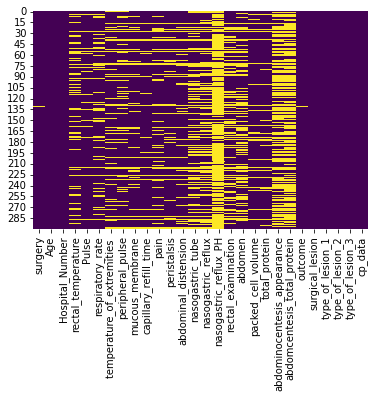

In [ ]:
import seaborn as sns
sns.heatmap(df_entrenamiento.isnull(),cbar=False,cmap='viridis')

Ahora procedemos a eliminar en primera instancia 

Procedemos a revisar el tipo de dato por cada atributo y encontramos dificultad porque la mayoría estaba como object

In [ ]:
df_entrenamiento.info()
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   surgery                      299 non-null    object
 1   Age                          300 non-null    int64 
 2   Hospital_Number              300 non-null    int64 
 3   rectal_temperature           240 non-null    object
 4   Pulse                        276 non-null    object
 5   respiratory_rate             242 non-null    object
 6   temperature_of_extremities   244 non-null    object
 7   peripheral_pulse             231 non-null    object
 8   mucous_membrane              253 non-null    object
 9   capillary_refill_time        268 non-null    object
 10  pain                         245 non-null    object
 11  peristalsis                  256 non-null    object
 12  abdominal_distension         244 non-null    object
 13  nasogastric_tube             196 no

# **FALTA HACERLO COMPLETO**
Ahora procedemos a asignar tipo de dato de acuerdo al registro que contiene cada columna así los categoricos que estan definidos con números enteros, se les tipea como enteros, a los datos continuos como float tanto en el dataset de entrenamiento como en el de prueba  y finalmente confirmamos que los cambios hayan quedado




In [ ]:
""" for col in df_entrenamiento.columns[:28]:
    df_entrenamiento[col]=df_entrenamiento[col].astype(int)

for col in df_prueba.columns[:28]:
    df_prueba[col]=df_prueba[col].astype(int)"""

for col in df_entrenamiento.columns[:28]:
    df_entrenamiento[col]=df_entrenamiento[col].astype(float)

df_entrenamiento['rectal_temperature']=df_entrenamiento['rectal_temperature'].astype(float)
df_entrenamiento['nasogastric_reflux_PH']=df_entrenamiento['nasogastric_reflux_PH'].astype(float)
df_entrenamiento['total_protein']=df_entrenamiento['total_protein'].astype(float)
df_entrenamiento['abdomcentesis_total_protein']=df_entrenamiento['abdomcentesis_total_protein'].astype(float)

df_prueba['rectal_temperature']=df_prueba['rectal_temperature'].astype(float)
df_prueba['nasogastric_reflux_PH']=df_prueba['nasogastric_reflux_PH'].astype(float)
df_prueba['total_protein']=df_prueba['total_protein'].astype(float)
df_prueba['abdomcentesis_total_protein']=df_prueba['abdomcentesis_total_protein'].astype(float)

df_entrenamiento.info()
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surgery                      299 non-null    float64
 1   Age                          300 non-null    float64
 2   Hospital_Number              300 non-null    float64
 3   rectal_temperature           240 non-null    float64
 4   Pulse                        276 non-null    float64
 5   respiratory_rate             242 non-null    float64
 6   temperature_of_extremities   244 non-null    float64
 7   peripheral_pulse             231 non-null    float64
 8   mucous_membrane              253 non-null    float64
 9   capillary_refill_time        268 non-null    float64
 10  pain                         245 non-null    float64
 11  peristalsis                  256 non-null    float64
 12  abdominal_distension         244 non-null    float64
 13  nasogastric_tube    

Ahora damos un vistazo al dataframe

In [ ]:
#display(df_entrenamiento)

Ahora verificamos algunos datos estadisticos de cada uno de los atributos.
Podemos observar que --------

In [ ]:
df_entrenamiento.describe()

,surgery,Age,Hospital_Number,rectal_temperature,Pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000,268.000000,...,271.000000,267.000000,135.000000,102.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.397993,1.640000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755,1.305970,...,46.295203,24.456929,2.037037,3.019608,1.551839,1.363333,3657.880000,90.226667,7.363333,1.670000
std,0.490305,2.173972,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294,0.477629,...,10.419335,27.475009,0.804905,1.968567,0.737187,0.481763,5399.513513,649.569234,127.536674,0.470998
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,23.000000,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000,1.000000,...,38.000000,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000,1.000000,...,45.000000,7.500000,2.000000,2.250000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,...,52.000000,57.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,75.000000,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000


In [ ]:
#dataframe[(dataframe['Physics'] > 10) &   (dataframe['Chemistry'] > 11) &  (dataframe['Math'] > 9)]['Name'].count())
"""sum_distension4 = df_entrenamiento[(df_entrenamiento['abdominal_distension'] == 4)]['abdominal_distension'].count()

porcentaje=sum_distension4/300
print(df_entrenamiento['abdominal_distension'].count())
print(porcentaje)"""
#### change describe max columns search "pandas " 

"sum_distension4 = df_entrenamiento[(df_entrenamiento['abdominal_distension'] == 4)]['abdominal_distension'].count()\n\nporcentaje=sum_distension4/300\nprint(df_entrenamiento['abdominal_distension'].count())\nprint(porcentaje)"

In [ ]:
"""for col in df_entrenamiento.columns:
    print('{} : {}'.format(col,df_entrenamiento[col].unique()))"""

"for col in df_entrenamiento.columns:\n    print('{} : {}'.format(col,df_entrenamiento[col].unique()))"

Ahora se verifica si el dataset contiene registros duplicados, pero el resultado dio que no 

In [ ]:
df_entrenamiento[df_entrenamiento.duplicated(keep=False)]

,surgery,Age,Hospital_Number,rectal_temperature,Pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data


**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">Surgery</td>
    <td class="tg-0lax">Cirugía</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Si  tuvo cirugía</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Fue tratado sin cirugía</td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>


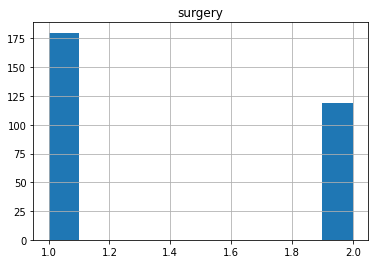

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[0])
df_entrenamiento.iloc[:,0].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">Age </td>
    <td class="tg-0lax">Edad</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Caballo adulto (≥ 6 meses)</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Caballo Joven (<6 meses)</td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

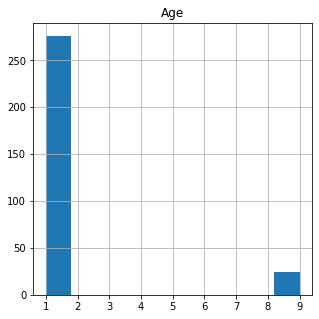

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[1])
df_entrenamiento.iloc[:,1].hist()

**ATRIBUTO CONTINUO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">Hospital Number </td>
    <td class="tg-0lax">No. HOSPITAL</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">Identificación númerica</td>
    <td class="tg-0lax">el número de caso asignado al caballo (puede no ser único si el caballo es tratado > 1 vez)</td>
  </tr>
</tbody>
</table>

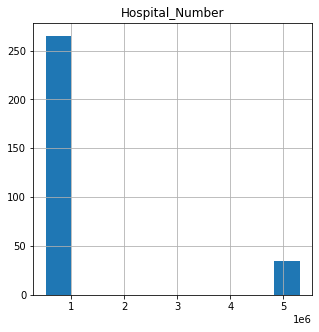

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[2])
df_entrenamiento.iloc[:,2].hist()

**ATRIBUTO CONTINUO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">rectal_temperature </td>
    <td class="tg-0lax">TEMPERATURA RECTAL</td>
    <td class="tg-0lax">lineal en grados centigrados</td>
    <td class="tg-0lax"> la temperatura puede reducirse cuando el animal está en estado de shock tardío
- la temperatura normal es de 37,8
- este parámetro generalmente cambiará a medida que avanza el problema, p. puede comenzar normal, luego elevarse debido a la lesión, volviendo al rango normal cuando el caballo entra en estado de shock </td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

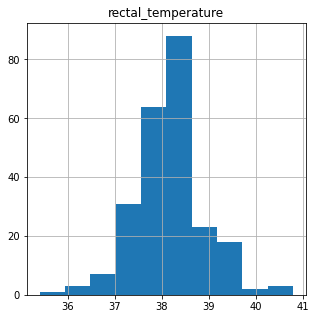

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[3])
df_entrenamiento.iloc[:,3].hist()

**ATRIBUTO Numérico**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">pulse </td>
    <td class="tg-0lax">pulso</td>
    <td class="tg-0lax">lineal</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">la frecuencia cardíaca en latidos por minuto - es un reflejo de la condición cardíaca: 30 -40 es normal para los adultos - es raro tener una frecuencia inferior a la normal aunque los caballos atléticos pueden tener una frecuencia de 20-25 - los animales con lesiones dolorosas o que sufren de shock circulatorio pueden tener una frecuencia cardíaca elevada</td>
  </tr>
</tbody>
</table>

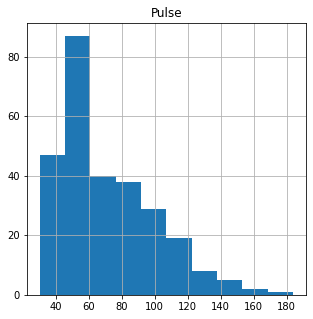

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[4])
df_entrenamiento.iloc[:,4].hist()

**ATRIBUTO Numérico**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">respiratory_rate </td>
    <td class="tg-0lax">FRECUENCIA RESPIRATORIA</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">lineal</td>
    <td class="tg-0lax">la frecuencia normal es 8 a 10, la utilidad es dudosa debido a las grandes fluctuaciones</td>
  </tr>
</tbody>
</table>

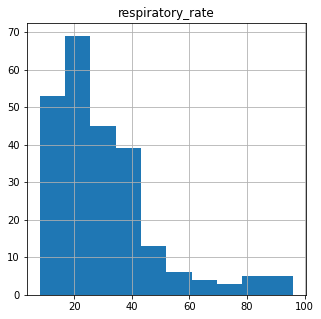

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[5])
df_entrenamiento.iloc[:,5].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">temperature_of_extremities </td>
    <td class="tg-0lax">TEMPERATURA DE LAS EXTREMIDADES</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Normal</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Calido</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">Fresco</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">Helado</td>
    <td class="tg-0lax">extremidades calientes deben correlacionarse con una temperatura rectal elevada - extremidades Fresco a Helado indican posible shock
</td>
  </tr>  
</tbody>
</table>

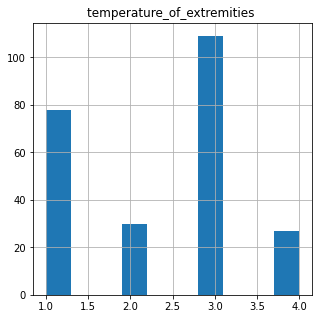

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[6])
df_entrenamiento.iloc[:,6].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">peripheral_pulse </td>
    <td class="tg-0lax">PULSO PERIFÉRICO </td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Normal</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Aumentado</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">Reducido</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">Ausente</td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

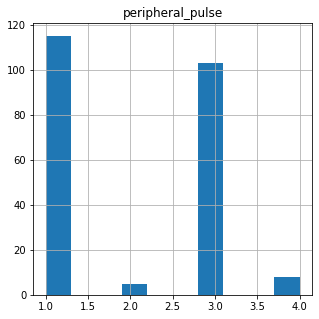

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[7])
df_entrenamiento.iloc[:,7].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">mucous_membrane </td>
    <td class="tg-0lax">MEMBRANAS MUCUOSAS</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">Rosa Normal</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">Rosa Brillante</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">Rosa Pálido</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">Cianótico Palido</td>
    <td class="tg-0lax"></td>
  </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">5</td>
    <td class="tg-0lax">Rojo brillante / Inyectado</td>
    <td class="tg-0lax"></td>
  </tr>
    </tr>
    <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">6</td>
    <td class="tg-0lax">Cianótico Oscuro</td>
    <td class="tg-0lax"></td>
  </tr>
</tbody>
</table>

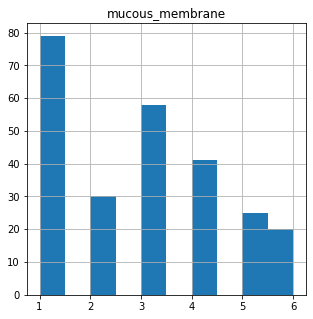

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[8])
df_entrenamiento.iloc[:,8].hist()

**ATRIBUTO CATEGÓRICO**

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Atributo</th>
    <th class="tg-0lax">Traduccion</th>
    <th class="tg-0lax">Valor</th>
    <th class="tg-0lax">Descripcion</th>
    <th class="tg-0lax">Observacion</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">capillary_refill_time </td>
    <td class="tg-0lax">TIEMPO DE LLENADO CAPILAR</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax"> < a tres segundos</td>
    <td class="tg-0lax">subjetiva del color</td>
  </tr>
  <tr>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">mayor o igual a tres segundos </td>
    <td class="tg-0lax">1 y 2 probablemente indican una circulación normal o levemente aumentada / 3 pueden ocurrir en estado de shock temprano / 4 y 6 son indicativos de compromiso circulatorio grave / 5 es más indicativo de septicemia</td>
  </tr>
</tbody>
</table>

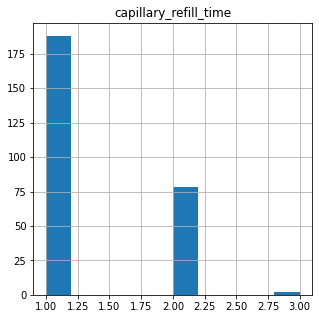

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.title(df_names[9])
df_entrenamiento.iloc[:,9].hist()

#PENDIENTE LOS DEMAS ATRIBUTOS

Ahora revisamos la correlación que existe entre variables a través del grafico de dispersión

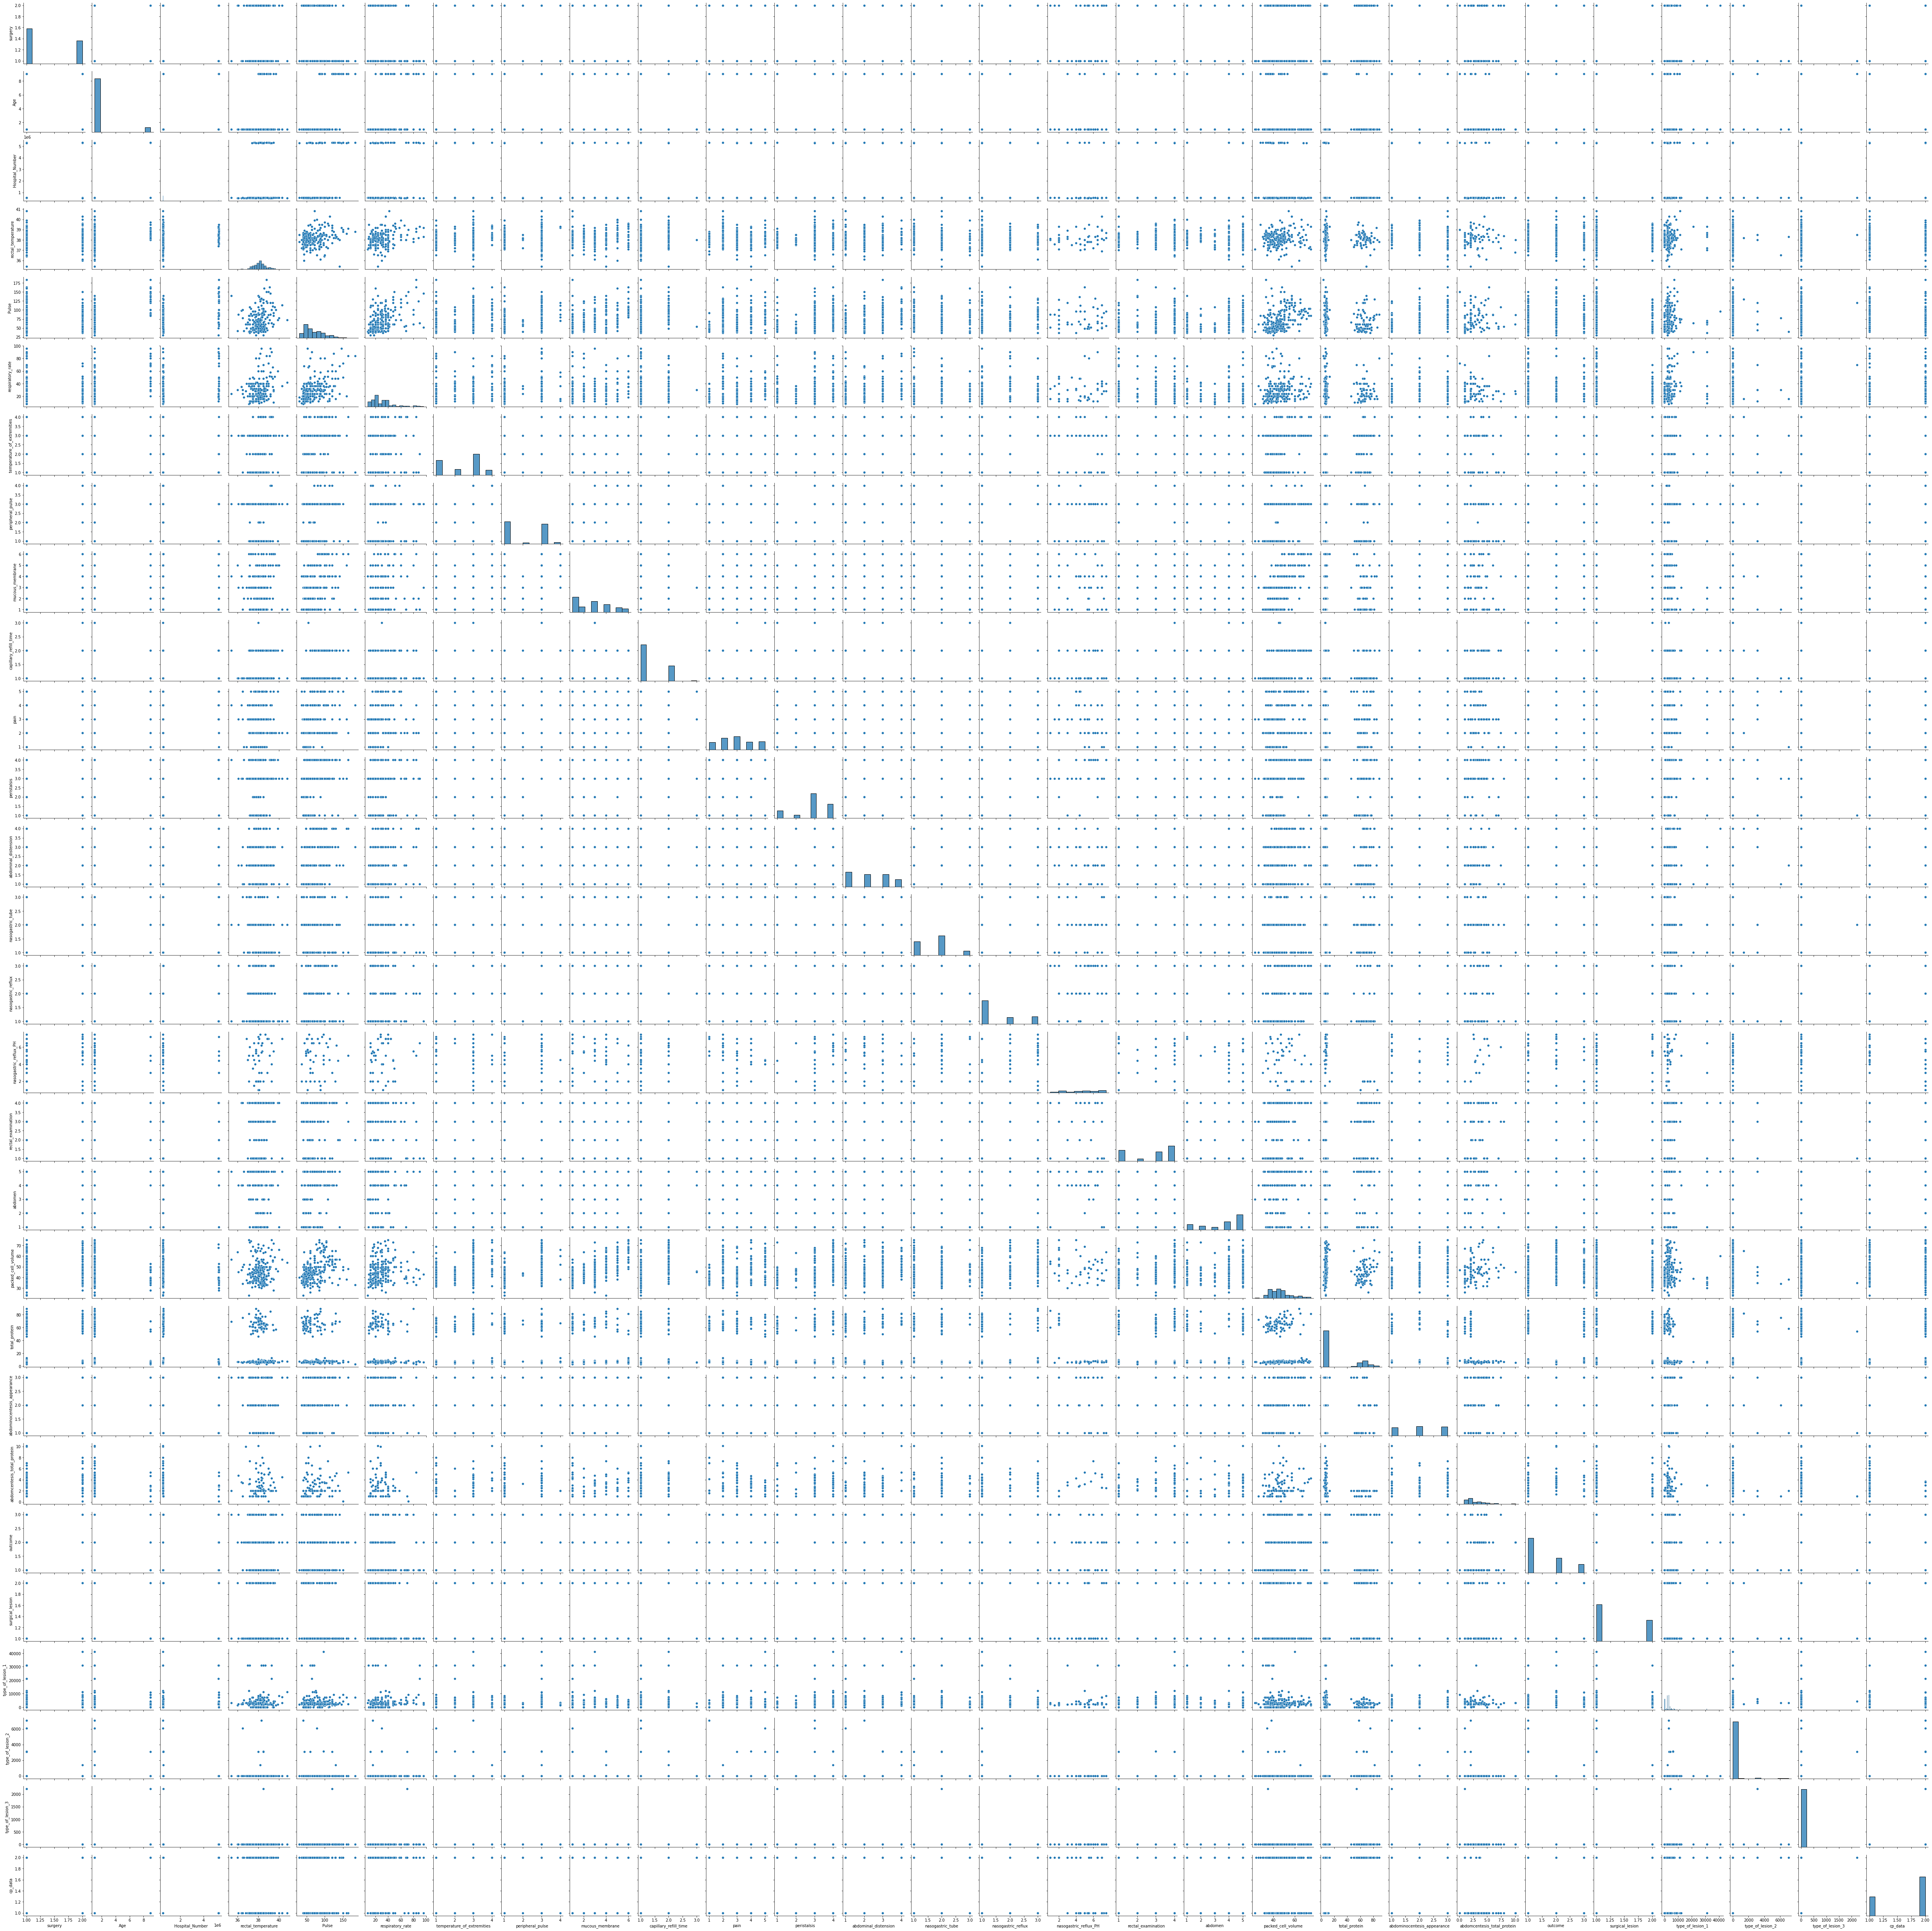

In [ ]:
sns.pairplot(df_entrenamiento)

Y ahora a través de un gráfico de calor

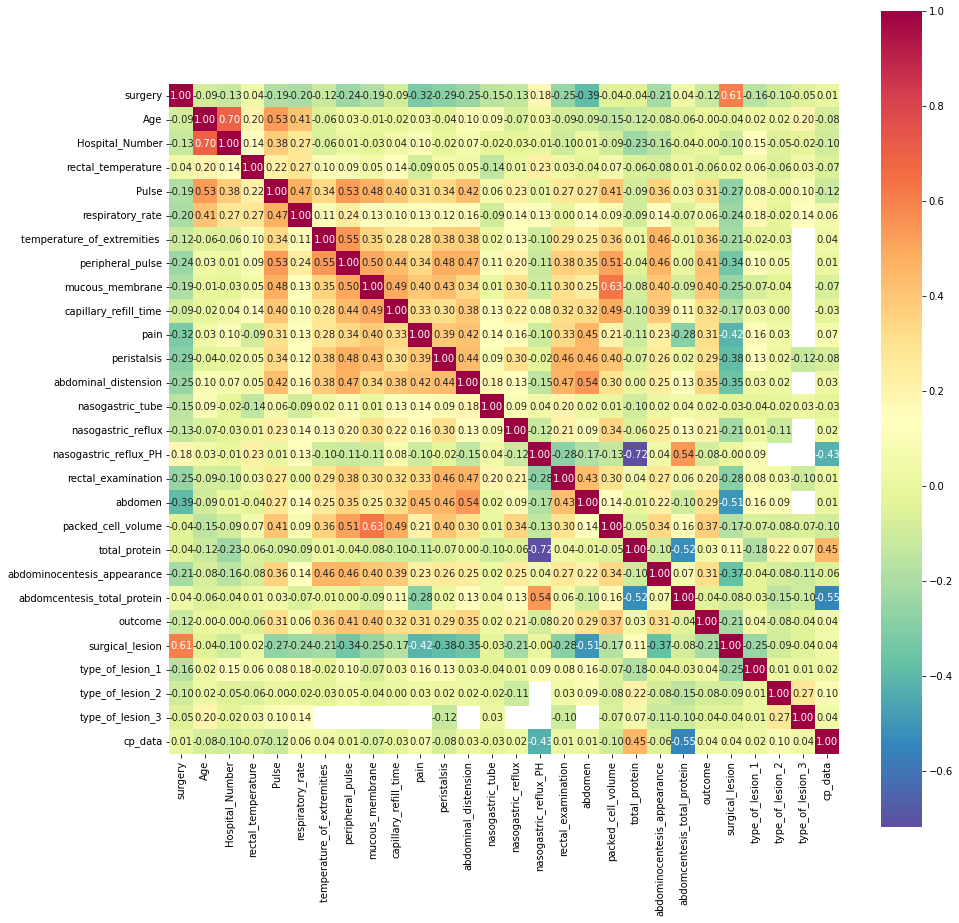

In [ ]:
plt.rcParams['figure.figsize'] = [15, 15]
corrmat = df_entrenamiento.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 yticklabels=df_entrenamiento.columns, 
                 xticklabels=df_entrenamiento.columns, 
                 cmap="Spectral_r")
plt.show()

In [ ]:
corr = df_entrenamiento.corr()
corr[['outcome']].sort_values(by = 'outcome',ascending = False)\
.style.background_gradient()

,outcome
outcome,1.000000
peripheral_pulse,0.410632
mucous_membrane,0.399916
packed_cell_volume,0.371962
temperature_of_extremities,0.355442
abdominal_distension,0.348863
capillary_refill_time,0.318901
Pulse,0.313215
abdominocentesis_appearance,0.311656
pain,0.309957


#¿Qué tipo de problema es? ​

​

Debido a la naturaleza del dataset es posible aplicar algoritmos de clasificación con el atributo surgical_lesion donde podríamos definir si de acuerdo a las características, la lesión que presenta el caballo requiere de cirugía o no.​

Debido que los datos de las columnas 25,26 y 27 son tipo de lesion y cada uno de los registros se divide en:

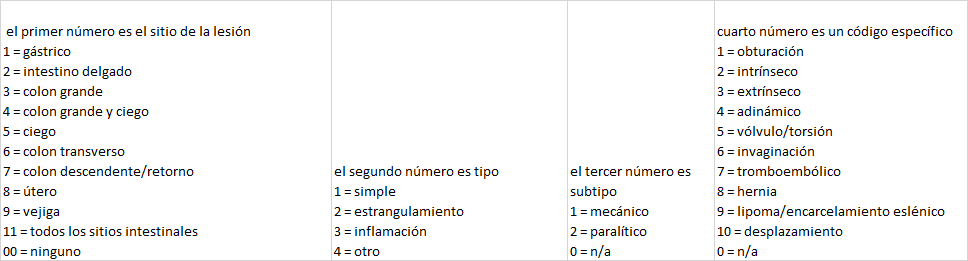 se debe realizar procesamiendo del mismo para identificar cada una de estas nuevas variables

In [ ]:
tipo_lesion1=df_entrenamiento['type_of_lesion_1'];

importamos copy para poder realizar copia del dataframe

In [ ]:
import copy as cp

Ahora eliminamos del dataframe de entrenamiento y de prueba la columna a predecir outcome y realizamos cambio de una variable multiclase(con 3 opciones) a una binaria(1 vivio y 2 murio), reemplazando los registros de 3 con 2 en ambos datasets

In [ ]:
X_entrenamiento = cp.deepcopy(df_entrenamiento.drop(['outcome'],axis=1).values)
Y_mc_entrenamiento=cp.deepcopy(df_entrenamiento['outcome'].values)
Y_bin_entrenamiento=cp.deepcopy(df_entrenamiento['outcome'].values)
Y_bin_entrenamiento[Y_bin_entrenamiento>2]=2

X_prueba=cp.deepcopy(df_prueba.drop(['outcome'],axis=1).values)
Y_mc_prueba=cp.deepcopy(df_prueba['outcome'].values)
Y_bin_prueba=cp.deepcopy(df_prueba['outcome'].values)
Y_bin_prueba[Y_bin_prueba>2]=2


print(X_entrenamiento)
print(Y_mc_entrenamiento)
print(Y_bin_entrenamiento)
df_entrenamiento.head()

print(X_prueba)
print(Y_mc_prueba)
print(Y_bin_prueba)
df_prueba.head()


TypeError: ignored

Se verifica si el dataset está balanceado en cuanto a su salida, para ello consultamos los posibles valores de los datos registrados en la variable a predecir en el dataframe de entrenamiento

In [ ]:
df_entrenamiento['outcome'].value_counts()

Trabajamos los Nans por cada columna y definimos que hacer con ellos

Descripción de los datos para identificar qué hacer con los datos faltantes:
Información de atributos:

1: ¿cirugía?
1 = Sí, tuvo cirugía
2 = Fue tratado sin cirugía

2: Edad
1 = Caballo adulto
2 = Joven (< 6 meses)

3: Número de hospital
- identificación numérica
- el número de caso asignado al caballo (puede no ser único si el caballo es tratado > 1 vez)

4: temperatura rectal
- lineal
- en grados centígrados.
- Puede haber una temperatura elevada debido a una infección.
- la temperatura puede reducirse cuando el animal está en estado de shock tardío
- la temperatura normal es de 37,8
- este parámetro generalmente cambiará a medida que avanza el problema, p. puede comenzar normal, luego elevarse debido a la lesión, volviendo al rango normal cuando el caballo entra en estado de shock
5: pulso
- lineal
- la frecuencia cardíaca en latidos por minuto
- es un reflejo de la condición cardíaca: 30 -40 es normal para los adultos
- es raro tener una frecuencia inferior a la normal aunque los caballos atléticos pueden tener una frecuencia de 20-25
- los animales con lesiones dolorosas o que sufren de shock circulatorio pueden tener una frecuencia cardíaca elevada

6: frecuencia respiratoria
- lineal
- la frecuencia normal es 8 a 10
- la utilidad es dudosa debido a las grandes fluctuaciones

7: temperatura de las extremidades
- una indicación subjetiva de la circulación periférica
- valores posibles:
1 = Normal
2 = Cálido
3 = Frío
4 = Frío
- extremidades frías a frías indican posible shock
- extremidades calientes deben correlacionarse con una temperatura rectal elevada.

8: pulso periférico
- subjetivo
- los valores posibles son:
1 = normal
2 = aumentado
3 = reducido
4 = ausente
- una pp normal o aumentada indica una circulación adecuada, mientras que una pp reducida o ausente indica una mala perfusión

9: membranas mucosas
- una medida subjetiva del color
- los valores posibles son:
1 = rosa normal
2 = rosa brillante
3 = rosa pálido
4 = cianótico pálido
5 = rojo brillante/inyectado
6 = cianótico oscuro
- 1 y 2 probablemente indican una circulación normal o levemente aumentada
- 3 pueden ocurrir en estado de shock temprano
- 4 y 6 son indicativos de compromiso circulatorio grave
- 5 es más indicativo de septicemia

10: tiempo de llenado capilar
- un juicio clínico. Cuanto más se recarga, peor es la circulación
- valores posibles
1 = < 3 segundos
2 = >= 3 segundos

11: dolor - un juicio subjetivo del nivel de dolor del caballo
- valores posibles:
1 = alerta, sin dolor
2 = deprimido
3 = dolor leve intermitente
4 = dolor intenso intermitente
5 = dolor intenso continuo
- ¡NO debe tratarse como una variable ordenada o discreta!
- En general, cuanto más doloroso, más probable es que requiera cirugía
- el tratamiento previo del dolor puede enmascarar el nivel de dolor hasta cierto punto

12: peristalsis
- una indicación de la actividad en el intestino del caballo. A medida que el intestino se vuelve más distendido o el caballo se vuelve más tóxico, la actividad disminuye
- valores posibles:
1 = hipermotilidad
2 = normal
3 = hipomotilidad
4 = ausente

13: distensión abdominal
- Un parámetro IMPORTANTE.
- valores posibles
1 = ninguno
2 = leve
3 = moderado
4 = severo
- es probable que un animal con distensión abdominal sienta dolor y tenga una motilidad intestinal reducida.
- es probable que un caballo con distensión abdominal severa requiera cirugía solo para aliviar la presión

14: sonda nasogástrica
- esto se refiere a cualquier gas que sale de la sonda
- valores posibles:
1 = ninguno
2 = leve
3 = significativo
- una tapa de gas grande en el estómago es probable que provoque molestias al caballo

15: reflujo nasogástrico
- valores posibles
1 = ninguno
2 = > 1 litro
3 = < 1 litro
- a mayor cantidad de reflujo, mayor probabilidad de que exista alguna obstrucción grave al paso del líquido desde el resto del intestino

16: reflujo nasogástrico PH
- lineal
- la escala es de 0 a 14, siendo 7 neutral
- los valores normales están en el rango de 3 a 4

17: tacto rectal - heces
- valores posibles
1 = normal
2 = aumentado
3 = disminuido
4 = ausente
- la ausencia de heces probablemente indica una obstrucción

18: abdomen
- valores posibles
1 = normal
2 = otro
3 = heces firmes en el intestino grueso
4 = intestino delgado distendido
5 = intestino grueso distendido
- 3 es probablemente una obstrucción causada por una impactación mecánica y normalmente se trata médicamente
- 4 y 5 indican una lesión quirúrgica

19: volumen celular empaquetado
- lineal
- el número de glóbulos rojos por volumen en la sangre
: el rango normal es de 30 a 50. El nivel aumenta a medida que la circulación se ve comprometida o el animal se deshidrata.

20: proteína total
- lineal
- los valores normales se encuentran en el rango de 6-7,5 (gms/dL)
- cuanto mayor sea el valor, mayor será la deshidratación

21: apariencia de abdominocentesis
- se coloca una aguja en el abdomen del caballo y se obtiene líquido de
la cavidad abdominal
- valores posibles:
1 = claro
2 = turbio
3 = serosanguinolento
- el líquido normal es claro mientras que turbio o serosanguinolento indica un intestino comprometido

22: abdomcentesis proteína total
- lineal
- cuanto mayor sea el nivel de proteína, más probable es que tenga un intestino comprometido. Los valores están en gms/dL

23: resultado
: ¿qué le sucedió finalmente al caballo?
- valores posibles:
1 = vivido
2 = murió
3 = fue sacrificado

24: ¿lesión quirúrgica?
- retrospectivamente, ¿el problema (lesión) fue quirúrgico?
- todos los casos son operados o autopsiados para que este valor y el tipo de lesión sean siempre conocidos
- valores posibles:
1 = Sí
2 = No

25, 26, 27: tipo de lesión
- el primer número es el sitio de la lesión
1 = gástrico
2 = intestino delgado
3 = colon grande
4 = colon grande y ciego
5 = ciego
6 = colon transverso
7 = colon descendente/retorno
8 = útero
9 = vejiga
11 = todos los sitios intestinales
00 = ninguno
- el segundo número es tipo
1 = simple
2 = estrangulamiento
3 = inflamación
4 = otro
- el tercer número es subtipo
1 = mecánico
2 = paralítico
0 = n/a
- cuarto número es un código específico
1 = obturación
2 = intrínseco
3 = extrínseco
4 = adinámico
5 = vólvulo/torsión
6 = invaginación
7 = tromboembólico
8 = hernia
9 = lipoma/encarcelamiento eslénico
10 = desplazamiento
0 = n/a
28: cp_data: ¿
hay datos patológicos para este caso?
1 = Sí
2 = No
: esta variable no tiene importancia ya que no se incluyen ni recopilan datos de patología para estos casos

Identificamos cantidad de registros nulos por cada columna en el de variables de entrenamiento:


In [ ]:
print(np.sum(np.isnan(X_entrenamiento),axis=0))

1 surgery= numerica- sin orden-mediana

2 Age= No tiene datos nulos

3 Hospital Number= no tiene datos nulos

4 rectal temperature= continua -mediana

5 pulse= numerica discreta- mediana

6 respiratory rate= numerica discreta- mediana

7 temperature of extremities= categorica-moda

8 peripheral pulse= categorica- moda

9 mucous membranes= categorica- moda

10 capillary refill time= categorica- moda

11 pain=categorico-moda

12 peristalsis= categorico-moda

13 abdominal distension=categorico-moda

14 nasogastric tube=categorico- moda

15 nasogastric reflux=categorico- moda

16 nasogastric reflux PH=categorico- moda

17 rectal examination=categorico- moda

18 abdomen=categorico - moda

19 packed cell volume=numerico discreto -mediana

20 total protein=numerico continuo -mediana

21 abdominocentesis appearance=categorico -moda

22 abdomcentesis total protein=entero continuo

 outcome=categorico - no tiene vacios Dato a predecir (Y)

23 surgical lesion=categorico- no tiene vacios- 

24 type of lesion 1- no tiene vacios

25 type of lesion 2- no tiene vacios

26 type of lesion 3- no tiene vacios

27 cp_data - no tiene vacios

Los valores categoricos los reemplazaremos por la moda

Los valores numéricos los reemplazaremos por la mediana


Aquí podemos observar que está mas hacia los caballos que vivieron, sin embargo al volver los 3 como un 2, tendríamos 178 vivos y 121 muertos, con una diferencia del 33% aprox.

Ahora identificamos el registro nulo de la variable Y de entrenamiento y la eliminamos tanto de las variables como en el valor a predecir

In [ ]:
#print(np.isnan(Y_mc_entrenamiento))
pos_nulo_entrenamiento=np.argwhere(np.isnan(Y_mc_entrenamiento))
print(Y_mc_entrenamiento[pos_nulo_entrenamiento])

Y_mc_entrenamiento=Y_mc_entrenamiento[~np.isnan(Y_mc_entrenamiento)]
Y_bin_entrenamiento=Y_bin_entrenamiento[~np.isnan(Y_bin_entrenamiento)]

In [ ]:
X_entrenamiento=np.asarray(X_entrenamiento)
np.delete(X_entrenamiento, 132, axis=0)

In [ ]:
print(sum(np.isnan(X_entrenamiento)))
X_entrenamiento = np.delete(X_entrenamiento,(132), axis = 0)
X_entrenamiento.shape


Teniendo en cuenta que contamos con registro en Y nulo, vamos a eliminar el registro completo

In [ ]:
import statistics as st

replace_values=[np.nanmedian(X_entrenamiento[:,0]),#Surgery reemplazado datos nulos por mediana
                None,
                None,
                np.nanmedian(X_entrenamiento[:,3]),#rectal temperature= continua -mediana
                np.nanmedian(X_entrenamiento[:,4]),#pulse= numerica discreta- mediana
                np.nanmedian(X_entrenamiento[:,5]),#respiratory rate= numerica discreta- mediana
                st.mode(X_entrenamiento[:,6]),#temperature of extremities= categorica-moda
                st.mode(X_entrenamiento[:,7]),#peripheral pulse= categorica- moda
                st.mode(X_entrenamiento[:,8]),# mucous membranes= categorica- moda
                np.nanmedian(X_entrenamiento[:,9]),# capillary refill time= categorica- moda
                st.mode(X_entrenamiento[:,10]),# pain=categorico-moda
                st.mode(X_entrenamiento[:,11]),#  peristalsis= categorico-moda
                st.mode(X_entrenamiento[:,12]),# abdominal distension=categorico-moda,
                np.nanmedian(X_entrenamiento[:,13]),# nasogastric tube=categorico- moda
                st.mode(X_entrenamiento[:,14]),# nasogastric reflux=categorico- moda
                st.mode(X_entrenamiento[:,15]),# nasogastric reflux PH=categorico- moda
                st.mode(X_entrenamiento[:,16]),# rectal examination=categorico- moda
                st.mode(X_entrenamiento[:,17]),# abdomen=categorico - moda
                np.nanmedian(X_entrenamiento[:,18]),# packed cell volume=numerico discreto -mediana
                np.nanmedian(X_entrenamiento[:,19]),# total protein=numerico continuo -mediana
                np.nanmedian(X_entrenamiento[:,20]),# abdominocentesis appearance=categorico -moda
                st.mode(X_entrenamiento[:,21]),# abdomcentesis total protein=entero continuo
                None,# -Surgical
                None,# -type lesion 1
                None,# -type lesion 2
                None,# -type lesion 3
                None
                ]

print(replace_values)


for i in range(X_entrenamiento.shape[1]):
  X_entrenamiento[np.isnan(X_entrenamiento[:,i]),i]=replace_values[i]
  X_prueba[np.isnan(X_prueba[:,i]),i]=replace_values[i]

print(X_entrenamiento)
print(X_prueba)

print(np.sum(np.isnan(X_entrenamiento),axis=0))
print(np.sum(np.isnan(X_prueba),axis=0))

Probamos la regresión logistica con la variable multiclase de outcome Y_MC

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_mc = LogisticRegression().fit(X_entrenamiento, Y_mc_entrenamiento)
print("Training set score: {:.3f}".format(logreg_mc.score(X_entrenamiento, Y_mc_entrenamiento)))
print("Test set score: {:.3f}".format(logreg_mc.score(X_prueba, Y_mc_prueba)))
print("List of Coefficients: ", logreg_mc.coef_)

Y ahora probamos la variable binaria con regresión logistica y comparamos score con la anterior

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_bin = LogisticRegression().fit(X_entrenamiento, Y_bin_entrenamiento)
print("Training set score: {:.3f}".format(logreg_bin.score(X_entrenamiento, Y_bin_entrenamiento)))
print("Test set score: {:.3f}".format(logreg_bin.score(X_prueba, Y_bin_prueba)))
print("List of Coefficients: ", logreg_bin.coef_)

#Balanceo
Aplicamos el Random Oversampling para nivelar los registros de caballos muertos hacia los registros de caballos vivos

In [ ]:
under_sampler = RandomUnderSampler(random_state=0)
X_res, y_res = under_sampler.fit_resample(X_entrenamiento, Y_bin_entrenamiento)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(Y_bin_prueba)}")
logreg = LogisticRegression().fit(X_res, y_res)
print("Training set score: {:.3f}".format(logreg.score(X_res, y_res)))
print("Test set score: {:.3f}".format(logreg.score(X_prueba, Y_bin_prueba)))
print("List of Coefficients: ", logreg.coef_)

#Selección de variables
Aplicamos RandomForest